<a href="https://colab.research.google.com/github/jjsauma/Coursera_Capstone/blob/master/exploring_data_coursera_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car accident severity prediction for insurance companies**
*Joaquín Jiménez-Sauma*

## **Introduction / Business Problem**

Predicting the cost, and hence the severity, of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Although it is generally considered a smart decision for the car owners to hire a car accident attorney following a crash, in minor collisions, owners can save on lawyer fees by handling the insurance claim themselves. This task makes the insurance companies engage in ample research beforehand by consulting resources and requesting a consultation on how to predict the severity of an accident and in turn the damage that needs to be covered. The overall paper-based process to calculate the severity claim is a tedious task to be completed. This is why insurance companies are continually seeking fresh ideas to improve their claims service for their clients in an automated way. Therefore, predictive analytics is a viable solution to predicting the cost, and hence severity, of claims on the available and historical data.
In this research, we would like to predict the severity of a car accident based on non-human and external factors involving the accident such as Temperature,	Wind Chill,	Humidity,	Pressure,	Visibility,	Wind_Speed and	Precipitation, in general, weather conditions.

We want to predict the severity code. This code is interpreted as a number between 1 and 4, where 1 indicates the least impact on traffic. 

## **Background**

Insurance companies use a variety of methods to calculate the value of the claim, many of which are different forms of the multiplier method. Unlike lawyers, however, insurance companies rarely use whole numbers as multipliers and instead utilize complex computer algorithms to determine the multiplier. 

Generally, there are two reasons people criticize the multiplier method. One criticism is focused on the argument of arbitrary multipliers, meaning that due to the fact that different attorneys use different multipliers, the results are often inconsistent. For example, one attorney may triple the special damages, while another might apply a multiplier of six, opening up a wide gap of variance between the two estimated sums. Additionally, the multiplier method can produce misleading results. The multiplier method can fail to account for more long-term costs and immaterial damage that will affect someone for the rest of their life.


In [1]:
# Imports

from string import ascii_letters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# setting up google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# **Read data**

This is a United States car accident dataset, which covers 49 states. The accident data are collected from February 2016 to June 2020, using two APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. There are about 3.5 million accident records in this dataset. 

Source: https://www.kaggle.com/sobhanmoosavi/us-accidents

In [2]:
# this dataset covers 49 states in the us from 2016 to 2020

df = pd.read_csv("/gdrive/My Drive/colab_notebooks/capstone/data/US_Accidents_June20.csv")

# **Exploratory Analysis**

In order to know the dataset better we will perform some preliminary analysis.

In [3]:
# Select the attributes we are going to use for our model

df = df[['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)','Precipitation(in)']]

In [4]:
# shape (rows, columns)
# this is how big it is...

df.shape

(3513617, 8)

In [5]:
# reading dataset general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Temperature(F)     float64
 2   Wind_Chill(F)      float64
 3   Humidity(%)        float64
 4   Pressure(in)       float64
 5   Visibility(mi)     float64
 6   Wind_Speed(mph)    float64
 7   Precipitation(in)  float64
dtypes: float64(7), int64(1)
memory usage: 214.5 MB


In [6]:
df.describe()

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,3.513617e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.339929e+00,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,5.521935e-01,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,1.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.000000e+00,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.000000e+00,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [7]:
# first rows of data
# this is how it looks

df.head()

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,2,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,2,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,3,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,2,36.0,33.3,89.0,29.65,6.0,3.5,NaN


# **Finding empty values in the dataset**


In [8]:
# Null values

df[['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)','Precipitation(in)']].isnull().sum()

Severity                   0
Temperature(F)         65732
Wind_Chill(F)        1868249
Humidity(%)            69687
Pressure(in)           55882
Visibility(mi)         75856
Wind_Speed(mph)       454609
Precipitation(in)    2025874
dtype: int64

Precipitation and Wind Chill contain 57% and 53% of null values respectively. If we delete the rows containing this data, we will lose a larger part of the dataset. It will be better to drop these attributes.

In [9]:
# dropping columns with a high percentage of NaN (null) values

# if column exists, delete them

if 'Precipitation(in)' in df:
    del df["Precipitation(in)"]
if 'Wind_Chill(F)' in df:
    del df["Wind_Chill(F)"]

# deleting rows with empty values

df.dropna(subset = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)'], inplace=True)

In [10]:
# shape after deleting rows with unknown, redundant and missing information
df.shape

(3033643, 6)

The original dataset contained 3,513,617 rows. After deleting rows with null values we have 3,033,643. We have lost 13.66% of our data. Since this is not a big loss (in my opinion), we can continue using this dataset

We can use the Pandas method corr() to find the feature other than Severity that is most correlated with Severity.

In [11]:
df.corr()['Severity'].sort_values()


Temperature(F)    -0.028153
Visibility(mi)    -0.006832
Humidity(%)        0.034319
Wind_Speed(mph)    0.035112
Pressure(in)       0.037423
Severity           1.000000
Name: Severity, dtype: float64

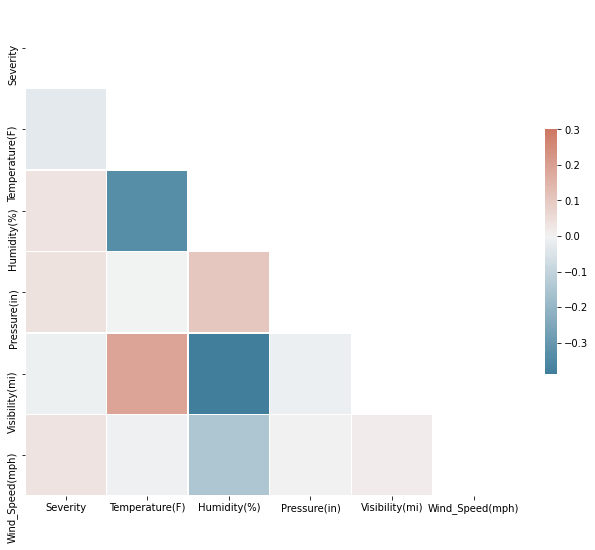

In [12]:
import seaborn as sns

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



From a preliminary analysis we can conclude that Humidity and Temperature are highly related, and pressure is Pressure is the feature most related to severity. But it is too early to draw conclusions.

### **Methodology**

We are ready to use our dataset and train our models. We will use **K-Nearest Neighbor**, **Decision Tree** and **Random Forest**.

Define X and Y:



In [13]:
# In order to reduce training time (more than three hours for the whole set, I will select a random subset of it)

df = df[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Severity']]
df_random_subset = df.sample(frac=0.05)
X = df_random_subset[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']]
y = df_random_subset['Severity'].values

We will use 20% of our data for testing and 80% for training.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (121345, 5) (121345,)
Test set: (30337, 5) (30337,)


## K Nearest Neighbor(KNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

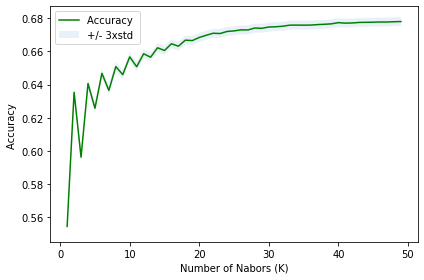

The best accuracy was with 0.678049906055312 with k= 49


In [22]:
# find the best K

from sklearn import metrics

Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    Kyhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, Kyhat)

    std_acc[n-1]=np.std(Kyhat==y_test)/np.sqrt(Kyhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

knnn = mean_acc.argmax()+1
bknnn = mean_acc.max()

print( "The best accuracy was with", bknnn, "with k=", knnn) 
neigh = KNeighborsClassifier(n_neighbors = knnn).fit(X_train, y_train)


## Decision Tree


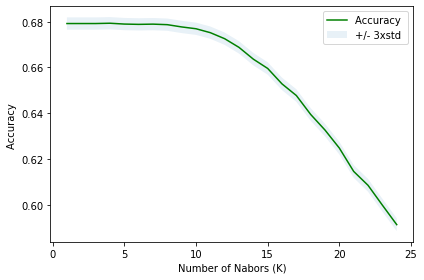

The best accuracy was with 0.679335464943798 with max_depth= 4


In [23]:
# find the best max_depth

from sklearn.tree import DecisionTreeClassifier

depth = 25
mean_acc = np.zeros((depth-1))
std_acc = np.zeros((depth-1))
ConfustionMx = [];
for n in range(1,depth):
    
    #Train Model and Predict 
    colDataTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    colDataTree.fit(X_train,y_train)
    DTyhat = colDataTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, DTyhat)
    std_acc[n-1]=np.std(DTyhat==y_test)/np.sqrt(DTyhat.shape[0])

plt.plot(range(1,depth),mean_acc,'g')
plt.fill_between(range(1,depth),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

dtn = mean_acc.argmax()+1
bdtn = mean_acc.max()

print( "The best accuracy was with", bdtn, "with max_depth=", dtn) 
neigh = KNeighborsClassifier(n_neighbors = dtn).fit(X_train, y_train)


## Random Forest

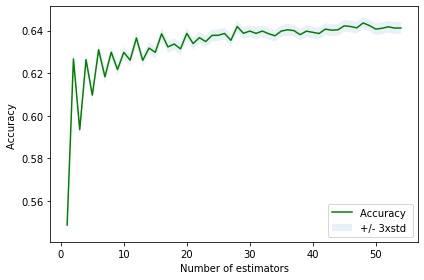

The best accuracy was with 0.6436364835019943 with n_estimators= 48


In [24]:
# Find best number of estimators

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

estimators = 55
mean_acc = np.zeros((estimators-1))
std_acc = np.zeros((estimators-1))
for n in range(1, estimators):
  rf = RandomForestClassifier(n_estimators=n, n_jobs=-1)
  rf.fit(X_train,y_train)
  RFyhat = rf.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, RFyhat)
  std_acc[n-1]=np.std(RFyhat==y_test)/np.sqrt(RFyhat.shape[0])

plt.plot(range(1,estimators),mean_acc,'g')
plt.fill_between(range(1,estimators),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of estimators')
plt.tight_layout()
plt.show()

rfn = mean_acc.argmax()+1
brfn = mean_acc.max()

print( "The best accuracy was with", mean_acc.max(), "with n_estimators=", rfn) 
neigh = KNeighborsClassifier(n_neighbors = rfn).fit(X_train, y_train)
   

## Results and Evaluation

Checking model accuracy

In [19]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [25]:
# Create evaluation results dataframe

dfAccuracy = pd.DataFrame(
    columns = ['Algorithm', 'Jaccard', 'F1-score']
)

# save data for knn on a new dataframe
neigh = KNeighborsClassifier(n_neighbors = knnn).fit(X_train, y_train)
yhat=neigh.predict(X_test)
new_row = {'Algorithm': 'KNN',
          'Jaccard':jaccard_similarity_score(y_test, yhat), 
          'F1-score':f1_score(y_test, yhat, average='weighted'),
          'Precision': bknnn
           }

dfAccuracy = dfAccuracy.append(new_row, ignore_index=True)

# save data for decision tree
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth = dtn).fit(X_train,y_train)
yhat = decision_tree.predict(X_test)
new_row = {'Algorithm': 'Decision Tree',
          'Jaccard':jaccard_similarity_score(y_test, yhat), 
          'F1-score':f1_score(y_test, yhat, average='weighted'),
          'Precision': bdtn
           }

dfAccuracy = dfAccuracy.append(new_row, ignore_index=True)

# save data for Random Forest
rf = RandomForestClassifier(n_estimators=rfn, n_jobs=-1).fit(X_train,y_train)
yhat = rf.predict(X_test)
new_row = {'Algorithm': 'Random Forest',
          'Jaccard':jaccard_similarity_score(y_test, yhat), 
          'F1-score':f1_score(y_test, yhat, average='weighted'),
          'Precision': brfn
           }

dfAccuracy = dfAccuracy.append(new_row, ignore_index=True)
dfAccuracy


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


,Algorithm,Jaccard,F1-score,Precision
0,KNN,0.678050,0.551332,0.678050
1,Decision Tree,0.679335,0.550211,0.679335
2,Random Forest,0.641098,0.586707,0.643636


## **Discussion and conclusion**

After presenting the problem, we found a training dataset and performed exploratory analysis to understand it. 

We developed models using K-Nearest Neighbor, Decision Tree and Random Forest

After presenting the problem, we found a training dataset 
and performed exploratory analysis to understand it. 

We developed models using K-Nearest Neighbor, Decision Tree and Random Forest and found the best training parameters as well.

Decision Tree model seems to perform better and to have better evaluation than the others. 

Weather conditions can help predict severity of an accident.

